missing values
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Column Datatypes
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher 

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\726499423.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_G3_Gender.index,y=avg_G3_Gender.values,palette="viridis")


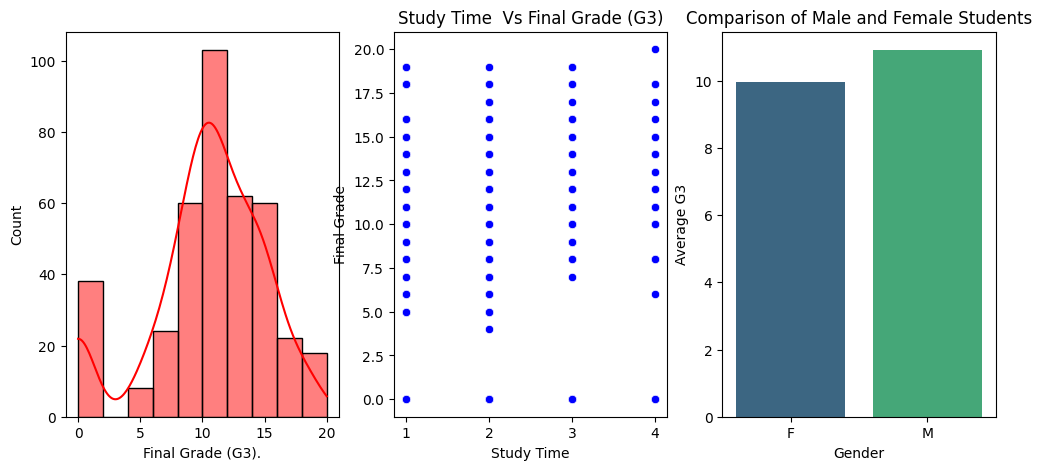

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student-mat.csv",delimiter=";")

df.head()

print("missing values")
print(df.isnull().sum())

print("Column Datatypes")
print(df.dtypes)

print("Dataset Size")
print(df.shape)

df=df.drop_duplicates()

df.fillna(df.median(numeric_only=True),inplace=True)



avg_math_G3= df["G3"].mean()
print("average score in math (G3)",avg_math_G3)


students_above15=df[df["G3"]>15].shape[0]
print("students scored above 15 in their final grade (G3)",students_above15)

correlation= df["studytime"].corr(df["G3"])
print("correlation between study time and final grade (G3)",correlation)

higher_avg= df.groupby("sex")["G3"].mean()
print("higher average final grade",higher_avg)

plt.figure(figsize=(12,5))

print("histogram of final grades (G3)")

plt.subplot(1,3,1)
sns.histplot(df["G3"],bins=10,kde=True,color="red")
plt.xlabel("Final Grade (G3).")
plt.ylabel("Count")

print("scatter plot between study time  and final grade (G3)")

plt.subplot(1,3,2)
sns.scatterplot(x=df["studytime"],y=df["G3"],color="Blue")
plt.title("Study Time  Vs Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade")

print("Bar Charts comparing the Average of male and Female students")

plt.subplot(1,3,3)
avg_G3_Gender=df.groupby("sex")["G3"].mean()
sns.barplot(x=avg_G3_Gender.index,y=avg_G3_Gender.values,palette="viridis")
plt.title("Comparison of Male and Female Students")
plt.xlabel("Gender")
plt.ylabel("Average G3")

plt.tight_layout
plt.show()